This is a simple Convolutional Neural Network (CNN) model to classify images of clock faces.

See the `train-12.ipynb` for the training code. The model is trained on a
reduced dataset with 12 classes (from 1:00 to 12:00). The best model is saved as `best_model.h5` in the `dataset-12` folder.

This program tests the model on a single image.

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import os, random

## pick a label to test
label = "08-00" # in the format "hh-mm"
folder = "/content/drive/MyDrive/lesson/dataset-12/test/" + label

## list all files in the subfolder (filtering out non-image files if needed)
images = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

## randomly pick one
random_image = random.choice(images)
img_path = os.path.join(folder, random_image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


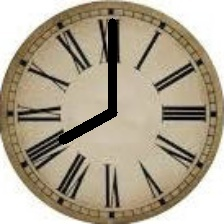

Predicting image: /content/drive/MyDrive/lesson/dataset-12/test/08-00/27.jpg
Predicted time: 8:00


In [6]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

from PIL import Image
from IPython.display import display

IMG = 224

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG, IMG), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to match training
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

############################################################
# load model
############################################################

best_model_file = "/content/drive/MyDrive/lesson/dataset-12/best_model.keras"

model = load_model(best_model_file)

# print(model.summary())

############################################################
# perform the prediction
############################################################

img_array = load_and_preprocess_image(img_path)
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

img = Image.open(img_path)
display(img)

print(f"Predicting image: {img_path}")
print(f"Predicted time: {predicted_class_index+1}:00")
